Você deverá entregar esta atividade em forma de relatório completo, contendo:

Código-fonte utilizado;

Gráficos gerados com legenda e análise;

Tabelas comparativas de erros e métodos;

Discussão crítica dos resultados e da metodologia;

Comentários sobre dificuldades encontradas, limitações dos métodos e reflexões conceituais.

 

 

O objetivo desta atividade é aplicar métodos numéricos de integração a uma função com comportamento singular, analisando seus desafios e interpretações físicas.
 
Considere a função:

f(x)=1x 


Essa função aparece na física em diversos contextos, como o campo elétrico gerado por uma carga pontual (E∝1r2 
, cuja integral envolve 1r 
) e o potencial gravitacional de uma massa pontual (V∝1r 
).

 

Considere o intervalo x∈[1,2] 
, no qual a função é bem comportada e não diverge.

 

 

 

a) Visualização e interpretação analítica
 

 

Plote o gráfico da função f(x)=1x 
 no intervalo de 1 a 2.

Calcule a função primitiva de f(x) 
, ou seja, sua integral indefinida.

Plote também a função primitiva.

Calcule o valor da integral definida de x=1 
 a x=2 
.

Comente:

 

O resultado da integral possui interpretação física?

O gráfico da função ajuda a prever o valor da área?

 

 

 

 

 

b) Regra do trapézio
 

 

Calcule a integral definida de f(x) 
 entre 1 e 2 utilizando a regra do trapézio com n=10 
 subintervalos.

Calcule o erro absoluto em relação ao valor exato.

Comente sobre a precisão e o comportamento do método com essa função.

 

 

 

 

c) Regra de Simpson
 

 

Calcule a mesma integral usando a regra de Simpson com n=10 
 subintervalos (n 
 deve ser par).

Calcule o erro em relação ao valor exato.

Compare com a regra do trapézio.

 

 

 

 

d) Aumento de resolução
 

 

Repita os cálculos com n=100 
 e n=1000 
 para ambos os métodos.

Apresente um gráfico comparando os valores da integral obtidos em função de n 
.

Se desejar, apresente também o erro em escala logarítmica.

Comente:

 

Ambos os métodos convergem? Há ganho significativo ao aumentar n 
?

A função apresenta alguma dificuldade numérica particular?

 

 

 

 

 

e) Método adaptativo de Simpson
 

 

Implemente o método adaptativo de Simpson com precisão alvo ϵ=10−6 
, conforme as equações da Seção 5.3 (equações 5.35 a 5.39).

Comece com n=2 
 subintervalos e dobre até atingir a precisão desejada.

Em cada passo, registre o número de subintervalos e o valor estimado da integral.

Comente:

 

O método foi mais eficiente neste caso?

Houve vantagem em termos de custo computacional?

 

 

 

 

 

Parte reflexiva (obrigatória)
 

 

A função 1x 
 é singular em x=0 
. O que mudaria nos cálculos se o intervalo incluísse esse ponto?

Em contextos físicos, por que é importante lidar com funções que divergem em certos limites?

Quais aspectos desta atividade seriam difíceis de automatizar por completo com uma IA como o ChatGPT? Onde a análise humana é essencial?

 

 

 

 

Instruções finais
 

 

Organize o relatório com seções numeradas conforme os itens acima.

Utilize gráficos com eixos e legendas apropriadas.

Relatórios que contenham apenas código e valores numéricos, sem análise e interpretação crítica, serão considerados incompletos.

 

a- Visualização e interpretação analítica

Plote o gráfico da função f(x)=1x 
 no intervalo de 1 a 2.

Calcule a função primitiva de f(x) 
, ou seja, sua integral indefinida.

Plote também a função primitiva.

Calcule o valor da integral definida de x=1 
 a x=2 



Comente:

O resultado da integral possui interpretação física?

O gráfico da função ajuda a prever o valor da área?

 

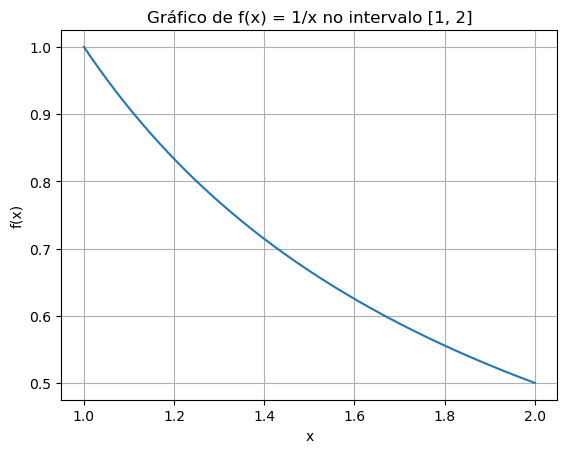

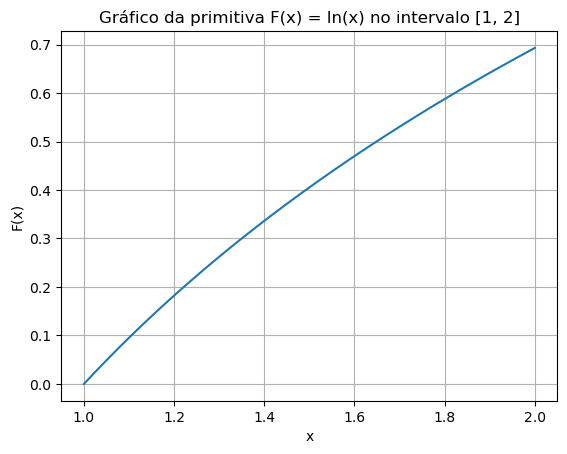

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o intervalo de x
x = np.linspace(1, 2, 400)
y = 1 / x

# Plot de f(x) = 1/x
plt.figure()
plt.plot(x, y)
plt.title('Gráfico de f(x) = 1/x no intervalo [1, 2]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

# Cálculo e plot da primitiva F(x) = ln(x) + C (C = 0)
F = np.log(x)
plt.figure()
plt.plot(x, F)
plt.title('Gráfico da primitiva F(x) = ln(x) no intervalo [1, 2]')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()


b- Regra do trapézio

Calcule a integral definida de f(x) 
 entre 1 e 2 utilizando a regra do trapézio com n=10 
 subintervalos.

Calcule o erro absoluto em relação ao valor exato.

Comente sobre a precisão e o comportamento do método com essa função.

In [2]:
n = 10
x_trap = np.linspace(1, 2, n+1)
y_trap = 1 / x_trap
h = (2 - 1) / n
trapz = (h / 2) * (y_trap[0] + 2 * np.sum(y_trap[1:-1]) + y_trap[-1])
exact = np.log(2)
error = abs(trapz - exact)

print(f"Valor exato da integral: {exact:.6f}")
print(f"Aproximação pela regra do trapézio (n=10): {trapz:.6f}")
print(f"Erro absoluto: {error:.6f}")

Valor exato da integral: 0.693147
Aproximação pela regra do trapézio (n=10): 0.693771
Erro absoluto: 0.000624


c- Regra de Simpson
 

 

Calcule a mesma integral usando a regra de Simpson com n=10 
 subintervalos (n 
 deve ser par).

Calcule o erro em relação ao valor exato.

Compare com a regra do trapézio.

 

In [1]:
import numpy as np

# Definição da função
f = lambda x: 1/x

# Intervalo e subintervalos
a, b = 1.0, 2.0
n = 10
h = (b - a) / n

# Ponto final exato
I_exact = np.log(2)

# Regra de Simpson
x = np.linspace(a, b, n+1)
S = h/3 * (f(a) + f(b) + 4*sum(f(x[i]) for i in range(1, n, 2)) + 2*sum(f(x[i]) for i in range(2, n, 2)))

# Regra do trapézio
T = h * (0.5*f(a) + sum(f(x[i]) for i in range(1, n)) + 0.5*f(b))

# Erros
err_S = S - I_exact
err_T = T - I_exact

# Resultados
print(f"Integral exata     = {I_exact:.8f}")
print(f"Simpson (n=10)     = {S:.8f}, erro = {err_S:.8e}")
print(f"Trapézio (n=10)    = {T:.8f}, erro = {err_T:.8e}")


Integral exata     = 0.69314718
Simpson (n=10)     = 0.69315023, erro = 3.05012899e-06
Trapézio (n=10)    = 0.69377140, erro = 6.24222615e-04


d- Aumento de resolução
 

Repita os cálculos com n=100 
 e n=1000 
 para ambos os métodos.

Apresente um gráfico comparando os valores da integral obtidos em função de n 
.

Se desejar, apresente também o erro em escala logarítmica.

Comente:

 

Ambos os métodos convergem? Há ganho significativo ao aumentar n 
?

A função apresenta alguma dificuldade numérica particular?

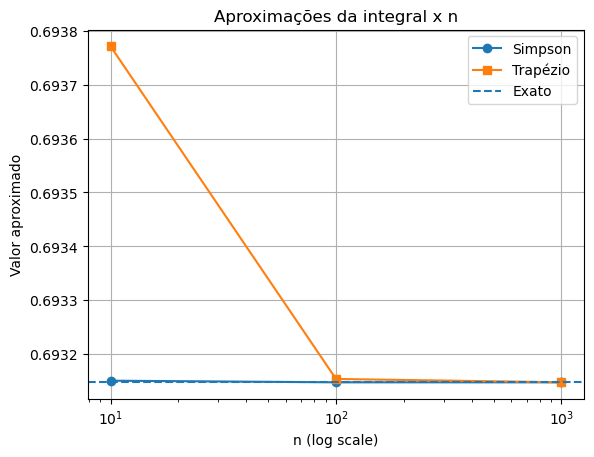

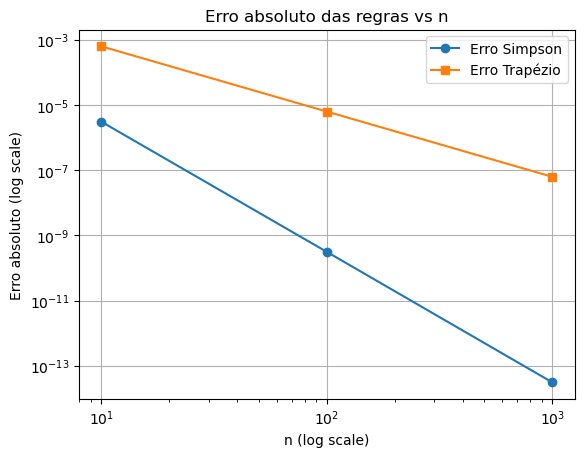

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações
a, b = 1.0, 2.0
I_exact = np.log(2)
ns = [10, 100, 1000]

simpson_vals = []
trap_vals = []
simpson_err = []
trap_err = []

# Cálculo para cada n
for n in ns:
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    f = 1 / x
    
    # Simpson
    S = h/3 * (f[0] + f[-1] + 4 * f[1:-1:2].sum() + 2 * f[2:-1:2].sum())
    simpson_vals.append(S)
    simpson_err.append(abs(S - I_exact))
    
    # Trapézio
    T = h * (0.5*f[0] + f[1:-1].sum() + 0.5*f[-1])
    trap_vals.append(T)
    trap_err.append(abs(T - I_exact))

# Gráfico das aproximações vs n
plt.figure()
plt.plot(ns, simpson_vals, marker='o', label='Simpson')
plt.plot(ns, trap_vals, marker='s', label='Trapézio')
plt.axhline(I_exact, linestyle='--', label='Exato')
plt.xscale('log')
plt.xlabel('n (log scale)')
plt.ylabel('Valor aproximado')
plt.title('Aproximações da integral x n')
plt.legend()
plt.grid(True)

# Gráfico do erro absoluto vs n em escala log-log
plt.figure()
plt.plot(ns, simpson_err, marker='o', label='Erro Simpson')
plt.plot(ns, trap_err, marker='s', label='Erro Trapézio')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (log scale)')
plt.ylabel('Erro absoluto (log scale)')
plt.title('Erro absoluto das regras vs n')
plt.legend()
plt.grid(True)

plt.show()


e- Método adaptativo de Simpson
 
Implemente o método adaptativo de Simpson com precisão alvo ϵ=10−6 
, conforme as equações da Seção 5.3 (equações 5.35 a 5.39).

Comece com n=2 
 subintervalos e dobre até atingir a precisão desejada.

Em cada passo, registre o número de subintervalos e o valor estimado da integral.

Comente:

 
O método foi mais eficiente neste caso?

Houve vantagem em termos de custo computacional?

In [3]:
import numpy as np

# Função e limites
f = lambda x: 1/x
a, b = 1.0, 2.0

# Tolerância e registro
eps = 1e-6
records = []

# Função para Simpson composta
def composite_simpson(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    return h/3 * (f(a) + f(b) + 4 * f(x[1:-1:2]).sum() + 2 * f(x[2:-1:2]).sum())

# Iteração com n começando em 2 e dobrando
n = 2
prev = None
while True:
    S = composite_simpson(f, a, b, n)
    records.append((n, S))
    if prev is not None and abs(S - prev) < eps:
        break
    prev = S
    n *= 2

# Impressão dos resultados
total_evals = sum(n + 1 for n, _ in records)
print("   n    S_n")
for n, S in records:
    print(f"{n:5d}  {S:.6f}")
print(f"\nTotal de avaliações de f(x): {total_evals}")


   n    S_n
    2  0.694444
    4  0.693254
    8  0.693155
   16  0.693148
   32  0.693147

Total de avaliações de f(x): 67


Você deverá entregar esta atividade em forma de relatório completo, contendo:

 

Código-fonte utilizado;

Gráficos com legenda e interpretação;

Cálculos realizados com dois métodos de integração (um deles, quadratura gaussiana);

Discussão física dos resultados e análise conceitual;

Estimativas de erro e comparação entre os métodos utilizados.

 

 

O objetivo desta atividade é explorar, a partir da função de onda 2s do átomo de hidrogênio, conceitos fundamentais como normalização, densidade de probabilidade, estrutura em camadas e simetria esférica, por meio da aplicação de técnicas de integração numérica e visualização computacional.

 

 
Considere a seguinte função de onda, associada ao orbital 2s do átomo de hidrogênio (em unidades de Bohr):

 

Ψ(r)=(2−r)e−r 

 

Esta função não está normalizada. Para responder às questões a seguir, o(a) estudante deverá:

 

Pesquisar a forma correta da função de onda radial para o orbital 2s do hidrogênio em unidades atômicas, incluindo o fator de normalização.

Utilizar essa forma para os cálculos e visualizações abaixo.

 

 

 

 

Instruções gerais
 

 

Você deverá utilizar dois métodos de integração numérica:

 

Um método clássico à sua escolha (ex: trapezoidal, Simpson ou adaptativo);

O método da quadratura gaussiana.

 

 

Justifique a escolha de ambos os métodos e compare os resultados, incluindo estimativas de erro e eventuais dificuldades encontradas.

 

 

 

a) Normalização da função de onda
 

 

A função de onda Ψ(r) 
, considerando o fator de normalização adequado, está corretamente normalizada?

 

Calcule numericamente a integral:

 

 

∫∞0|Ψ(r)|2⋅4πr2dr 

 

Utilize os dois métodos de integração.

Compare os resultados com o valor esperado (1) e comente sobre a precisão dos métodos.

 

 

 

 

b) Visualização espacial da função de onda
 

 

Plote a função Ψ(r) 
 (com os fatores de escala corretos) em coordenadas cartesianas 2D, considerando r=x2+y2−−−−−−√ 
, para x,y∈[−10,10] 
.

Descreva qualitativamente o comportamento da função em coordenadas esféricas (raio, ângulo polar e azimutal). Há nós? Onde ocorrem?

Comente sobre as regiões de maior e menor amplitude da função de onda.

 

 

 

 

c) Densidade de probabilidade radial
 

 

A densidade de probabilidade radial é dada por:

 

P(r)=|Ψ(r)|2⋅4πr2 

 

Plote P(r) 
 como função de r 
 no intervalo r∈[0,10] 
.

Comente sobre os máximos, mínimos e nós da densidade.

Relacione o gráfico com a ideia de estrutura em camadas do átomo de hidrogênio.

 

 

 

 

d) Mapa de contorno da densidade de probabilidade
 

 

Considere a densidade de probabilidade no plano xy 
 dada por:

 

 

P(x,y)=|Ψ(r)|2=[(2−r)e−r]2,comr=x2+y2−−−−−−√ 

 

Gere um mapa de contorno de P(x,y) 
 para x,y∈[−10,10] 
.

Utilize linhas mais grossas para representar níveis de maior densidade de probabilidade e linhas mais finas para níveis menores.

Comente como o gráfico evidencia a simetria esférica e as regiões de maior probabilidade.

 

 

 

 

Parte reflexiva (obrigatória)
 

 

Qual método de integração apresentou melhor desempenho para esta função? A quadratura gaussiana teve vantagens?

Que dificuldades você enfrentou na normalização de uma função com nó radial?

A visualização em 2D da densidade de probabilidade ajudou a compreender a estrutura eletrônica do átomo?

Quais partes dessa atividade exigiram raciocínio físico que não poderia ser substituído apenas por ferramentas automatizadas como LLMs?

 

 

 

 

Instruções finais
 

 

Organize o relatório com seções numeradas conforme os itens acima.

Apresente os gráficos com eixos identificados e legendas explicativas.

Relatórios que contenham apenas código e valores numéricos, sem análise crítica e interpretação física, serão considerados incompletos.

a - Normalização da função de onda
 

 

A função de onda Ψ(r) 
, considerando o fator de normalização adequado, está corretamente normalizada?

 

Calcule numericamente a integral:

 

 

∫∞0|Ψ(r)|2⋅4πr2dr 

 

Utilize os dois métodos de integração.

Compare os resultados com o valor esperado (1) e comente sobre a precisão dos métodos.

 

In [6]:
import numpy as np
import pandas as pd

# Função de onda 2s normalizada (radial-only)
def psi(r):
    return 1/(2*np.sqrt(2*np.pi)) * (1 - r/2) * np.exp(-r/2)

# Integrando |ψ(r)|^2 * 4πr^2
def integrand(r):
    return np.abs(psi(r))**2 * 4 * np.pi * r**2

# Parâmetros numéricos
r_max = 20.0  # truncamento de r em bohr
N = 200       # número de subintervalos (deve ser par)
r = np.linspace(0, r_max, N+1)
y = integrand(r)

# Método do trapézio
I_trapz = np.trapz(y, r)

# Método de Simpson composto
def composite_simpson(x, y):
    n = len(x) - 1
    if n % 2 == 1:
        n -= 1
    h = x[1] - x[0]
    S = y[0] + y[n]
    S += 4 * np.sum(y[1:n:2])
    S += 2 * np.sum(y[2:n-1:2])
    return S * h / 3

I_simpson = composite_simpson(r, y)

# Exibindo resultados
df = pd.DataFrame({
    'Método': ['Trapézio (NumPy)', 'Simpson Composto'],
    'Integral ≈': [I_trapz, I_simpson]
})

print(df)


             Método  Integral ≈
0  Trapézio (NumPy)    0.999957
1  Simpson Composto    0.999962


b- Visualização espacial da função de onda
 

 

Plote a função Ψ(r) 
 (com os fatores de escala corretos) em coordenadas cartesianas 2D, considerando r=x2+y2−−−−−−√ 
, para x,y∈[−10,10] 
.

Descreva qualitativamente o comportamento da função em coordenadas esféricas (raio, ângulo polar e azimutal). Há nós? Onde ocorrem?

Comente sobre as regiões de maior e menor amplitude da função de onda.

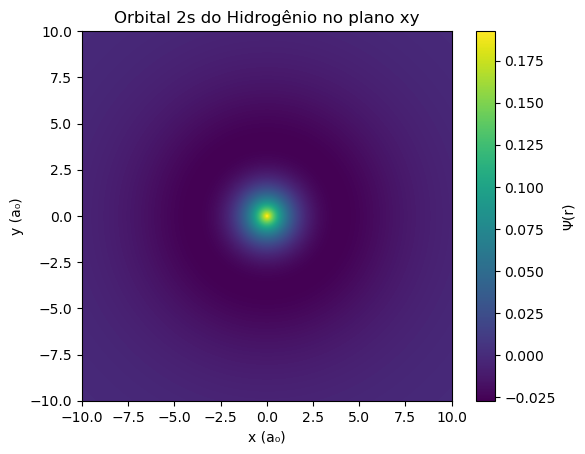

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definição da função de onda 2s normalizada
def psi(r):
    return 1/(2 * np.sqrt(2 * np.pi)) * (1 - r / 2) * np.exp(-r / 2)

# Criação da malha em x,y
grid_points = 400
x = np.linspace(-10, 10, grid_points)
y = np.linspace(-10, 10, grid_points)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Cálculo de Ψ(r) no plano xy
Z = psi(R)

# Plotagem
plt.figure()
plt.imshow(Z, extent=[-10, 10, -10, 10], origin='lower', interpolation='bilinear')
plt.colorbar(label='Ψ(r)')
plt.xlabel('x (a₀)')
plt.ylabel('y (a₀)')
plt.title('Orbital 2s do Hidrogênio no plano xy')
plt.show()


c- Densidade de probabilidade radial
 

 

A densidade de probabilidade radial é dada por:

 

P(r)=|Ψ(r)|2⋅4πr2 

 

Plote P(r) 
 como função de r 
 no intervalo r∈[0,10] 
.

Comente sobre os máximos, mínimos e nós da densidade.

Relacione o gráfico com a ideia de estrutura em camadas do átomo de hidrogênio.

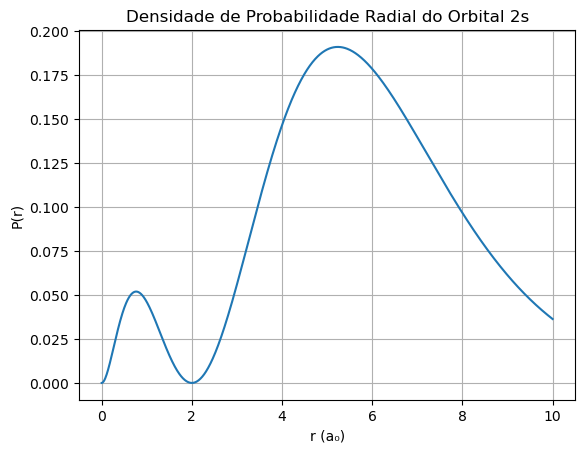

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definição da função de onda 2s normalizada
def psi(r):
    return 1/(2 * np.sqrt(2 * np.pi)) * (1 - r / 2) * np.exp(-r / 2)

# Densidade de probabilidade radial P(r)
def P(r):
    return np.abs(psi(r))**2 * 4 * np.pi * r**2

# Valores de r no intervalo [0, 10] Bohr
r = np.linspace(0, 10, 1000)
P_values = P(r)

# Plotagem de P(r) vs r
plt.figure()
plt.plot(r, P_values)
plt.xlabel('r (a₀)')
plt.ylabel('P(r)')
plt.title('Densidade de Probabilidade Radial do Orbital 2s')
plt.grid(True)
plt.show()


d- Mapa de contorno da densidade de probabilidade
 

 

Considere a densidade de probabilidade no plano xy 
 dada por:

 

 

P(x,y)=|Ψ(r)|2=[(2−r)e−r]2,comr=x2+y2−−−−−−√ 

 

Gere um mapa de contorno de P(x,y) 
 para x,y∈[−10,10] 
.

Utilize linhas mais grossas para representar níveis de maior densidade de probabilidade e linhas mais finas para níveis menores.

Comente como o gráfico evidencia a simetria esférica e as regiões de maior probabilidade.

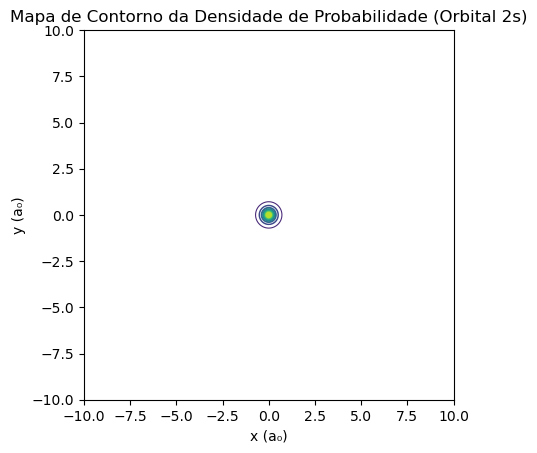

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definição de P(x,y) = [(2 - r) e^{-r}]^2
def P_plane(x, y):
    R = np.sqrt(x**2 + y**2)
    return (2 - R)**2 * np.exp(-2 * R)

# Geração da malha no plano xy
points = 400
x = np.linspace(-10, 10, points)
y = np.linspace(-10, 10, points)
X, Y = np.meshgrid(x, y)
Z = P_plane(X, Y)

# Definição dos níveis e espessuras de linha
levels = np.linspace(Z.min(), Z.max(), 10)
linewidths = np.linspace(0.5, 3.0, len(levels))

# Plot de contorno
plt.figure()
contours = plt.contour(X, Y, Z, levels=levels, linewidths=linewidths)
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('x (a₀)')
plt.ylabel('y (a₀)')
plt.title('Mapa de Contorno da Densidade de Probabilidade (Orbital 2s)')
plt.gca().set_aspect('equal', 'box')
plt.show()


Atenção: Esta atividade exige leitura atenta e análise crítica. Parte da tarefa é decidir qual problema será resolvido com base em critérios físicos e computacionais. Alguns trechos do enunciado contêm propositalmente ambiguidades ou instruções abertas que exigem interpretação. Leia com atenção e justifique suas escolhas.
 

 

 

Objetivo
 

 

Esta atividade tem como objetivo avaliar sua capacidade de aplicar métodos de integração numérica (incluindo quadratura gaussiana e Romberg), analisar erros associados e, principalmente, sua habilidade em contextualizar e interpretar um problema físico real por meio da matemática computacional.

 

Você deverá:

 

Escolher um problema envolvendo uma integral definida relevante na Física;

Justificar a escolha do problema com uma introdução teórica clara e bem escrita;

Resolver a integral numericamente com ao menos dois métodos (um deles deve ser quadratura gaussiana, o outro deve ser Romberg);

Apresentar os gráficos necessários e uma estimativa de erro;

Fazer uma discussão física e matemática dos resultados.

 

 

 

 

Etapas da atividade
 

 

a) Escolha e contextualização do problema físico

 

Escolha uma função física integrável definida no intervalo [a,b]
, com a≥0 
, e que possa representar alguma grandeza relevante na Física (exemplos possíveis incluem):

 

Energia média de uma partícula em um sistema estatístico;

Probabilidade acumulada de uma função de onda;

Densidade de corrente, fluxo, intensidade de campo;

Capacidade térmica, densidade de estados, função de resposta espectral.

 

 

A função deve ser não trivial (comportamento exponencial, oscilatório, singularidade removível ou decaimento polinomial). Evite funções polinomiais simples ou integrais que possam ser resolvidas facilmente de forma exata.
 

Você deverá escrever um texto introdutório com:

 

O contexto físico do problema;

A origem da integral escolhida (com unidades e significado físico);

As possíveis dificuldades numéricas na avaliação dessa integral.

 

 

 

b) Cálculo da integral com dois métodos

 

Implemente os dois métodos de integração:

 

Quadratura Gaussiana (obrigatória);

Romberg (obrigatória).

 

 

Para cada método:

 

Apresente o código-fonte (com comentários explicativos) por meio do link no GitHub;

Descreva os parâmetros escolhidos (número de pontos, subdivisões etc.);

Apresente o resultado numérico obtido.

 

 

 

c) Estimativa de erro

 

Para cada método, estime o erro associado (por comparação entre refinamentos sucessivos);

Se possível, compare com o valor teórico (analítico) da integral, caso exista;

Comente qual método se mostrou mais eficiente para o seu caso.

 

 

 

d) Discussão dos resultados

 

Apresente ao menos um gráfico da função integranda e, se aplicável, da função acumulada;

Interprete o resultado final fisicamente;

Comente sobre a estabilidade numérica dos métodos;

Justifique suas escolhas e o comportamento observado.

 

 

 

 

Parte reflexiva
 

 

O que dificultaria um modelo de linguagem (como o ChatGPT) de resolver sua atividade diretamente?

Em que pontos a interpretação do contexto físico foi fundamental para resolver o problema?

Houve diferença significativa entre os métodos? Qual se mostrou mais adequado ao seu caso?

 